In [1]:
import pandas as pd

import datetime
import requests
import io
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#first load prices from yahoo finance
def get_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+86400
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=0&period2=" + str(now) + "&interval=1d&events=history"
    response = requests.post(url)

    with open('file.csv', 'w') as f:
        f.writelines(response.text)

    df = pd.read_csv('file.csv', index_col='Date', parse_dates=['Date'])

    return df

url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)

f = io.StringIO(response.text)
dfs = pd.read_html(f)
world_index = dfs[0]
historical_world_index = {}
#load index price
def load_index():
    print("Loading index........")
    
    for symbol, name in zip(world_index['Symbol'], world_index['Name']):
    
        print(name)
    
        historical_world_index[name] = get_price(symbol)
        time.sleep(5) #we don't want to get blocked ya
        
    print(".......Complete loading")

load_index()

Loading index........
S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100 Price Return
Russell 2000
Vix
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index
.......Complete loading


In [19]:
#collect adjusted close prices from each index for each historical date
adjclose = {}
for name, price in historical_world_index.items():
    if price.index.is_unique:
        adjclose[name] = price['Adj Close']
    
adjclose = pd.DataFrame(adjclose)
adjclose

,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,93.000000,NaN,NaN,550.890015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,93.459999,NaN,NaN,553.640015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,92.820000,NaN,NaN,549.830017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,92.629997,NaN,NaN,548.989990,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,92.680000,NaN,NaN,549.409973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-09,92.400002,NaN,NaN,547.929993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-12,91.699997,NaN,NaN,543.599976,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-13,91.919998,NaN,NaN,543.909973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-14,91.650002,NaN,NaN,542.859985,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#map correlation matrix
corr = adjclose.corr()
print(corr)


                            S&P 500    Dow 30    Nasdaq  NYSE COMPOSITE (DJ)  \
S&P 500                    1.000000  0.995228  0.979863             0.984778   
Dow 30                     0.995228  1.000000  0.971002             0.979238   
Nasdaq                     0.979863  0.971002  1.000000             0.937638   
NYSE COMPOSITE (DJ)        0.984778  0.979238  0.937638             1.000000   
NYSE AMEX COMPOSITE INDEX  0.737060  0.784837  0.684222             0.885740   
Cboe UK 100 Price Return   0.904940  0.892827  0.882044             0.947116   
Russell 2000               0.970996  0.979936  0.957470             0.961030   
Vix                       -0.183603 -0.169977 -0.200417            -0.170558   
FTSE 100                   0.931213  0.918803  0.863043             0.955389   
DAX PERFORMANCE-INDEX      0.977730  0.970800  0.960182             0.965938   
CAC 40                     0.781868  0.751609  0.714366             0.814327   
ESTX 50 PR.EUR             0.738215  0.7

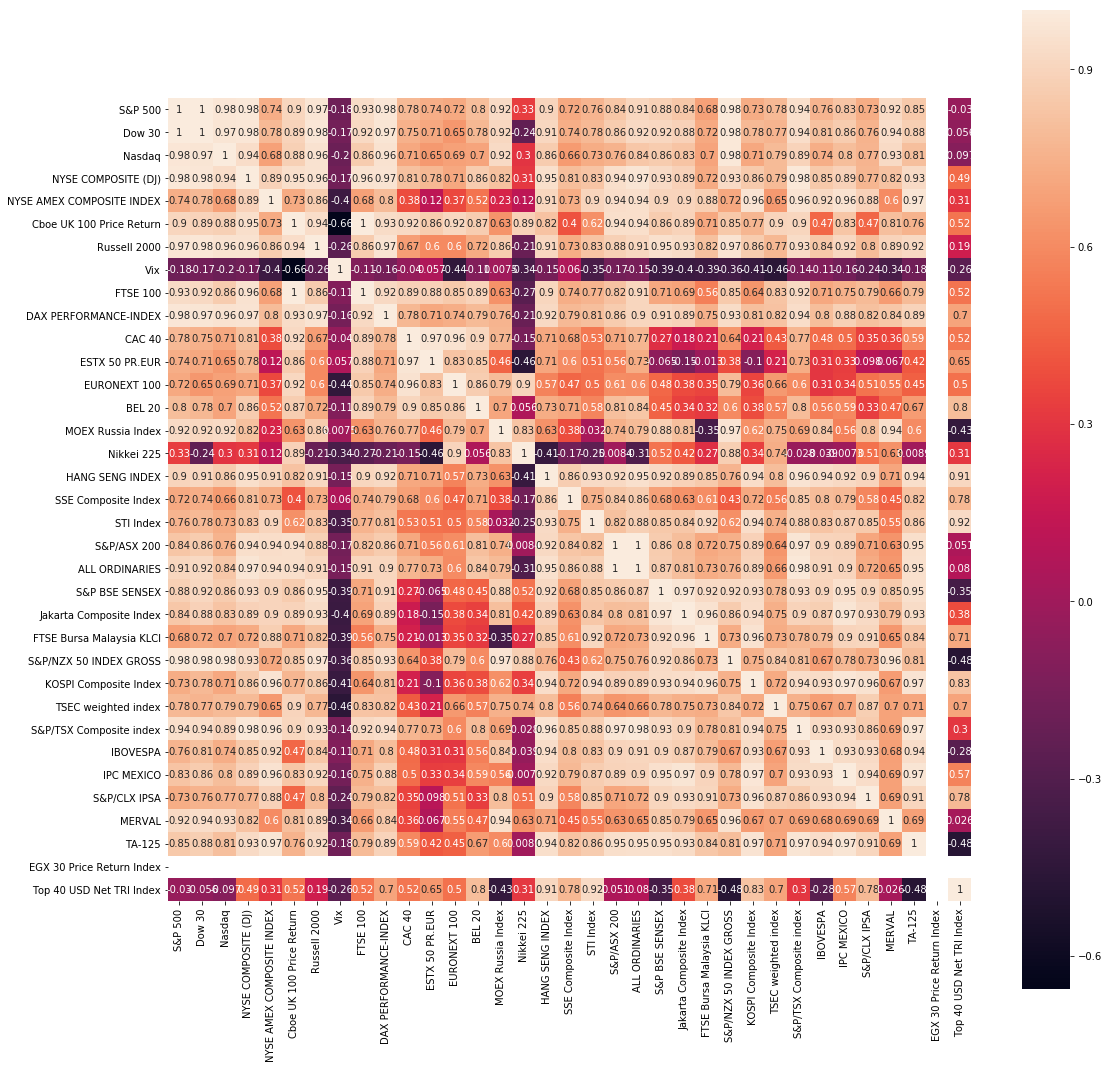

In [21]:
#plotting heatmap using correlation matrix 
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)